# Working with Twitter data

This notebook can be downloaded via [https://edu.nl/83a7b](https://edu.nl/83a7b)


## Getting keys and tokens

1. If you don’t have a Twitter account yet, sign up at https://twitter.com/ 

2. If you do have a Twitter account, you should be able to access the Twitter developer portal at https://developer.twitter.com/. 

3. Create a new App. 
    - Under “Projects & Apps” > “Overview”, click on “Create App”. 
    - Enter a name for your app. Note that the name of this app must be unique. 
        
4. If you managed to create an App, you should be able to find your credentials in the project folder created for this new App, under “Keys and Tokens”. To work with the Twitter API, you need four values:  
    - API Key 
    - API Secret 
    - Access Token 
    - Access Secret
    - Bearer token
    
    
5. Note that these keys and tokens will only be shown once, immediately after you have created them. Make sure that you copy these values directly. It is useful toi make a Python file on your computer, named ‘credentials.py’ in which you store these values, as follows

    ```
    #Twitter API credentials
    consumer_key = 'xxx'
    consumer_secret = 'xxx'
    access_key = 'xxx
    access_secret = 'xxx'
    bearer_token = 'xxx'
    ```

If, for some reason, you are unable to find the keys and tokens again, you can always regerate these values in the Twitter Development Portal.   


## Twitter API V1.1

If you have obtained credentials (keys and tokens) using the steps that have been discussed above, this should give you access to the Twitter API V1.1. This basic version of the API is useful for getting started, and for testing certain solutions. Using the v1.1. API, you can download tweets, you can post new tweets, and you can request user information. There are a number of limitations, however. You can only download tweets that have been posted within the last 7 days, for example. 

There is currently a new W2 Twitter API. If you have access to the V1.1 API, you can [easily migrate to this new version](https://developer.twitter.com/en/docs/twitter-api/migrate/overview). The V2 API offers a number of [new possibilities](https://developer.twitter.com/en/docs/twitter-api/migrate/whats-new), but there are still some limitations with respect to the number of tweets you can download. If you still need more options, you can apply for a premium, and enterprise or an academic account at Twitter. 

## Tweepy

There are several Python packages that let you work with the Twitter API. Examples include `Twython` and `Tweepy`. This notebook explains the use of tweepy. The package can be installed first. 

In [ ]:
#!pip install -U tweepy

After a successful installation, you should be able to import the package. 

In [1]:
# import module
import tweepy

If you want to see an overview of all the functions that have been defined in the `tweepy` package, you can consult [the documentation](https://docs.tweepy.org/en/stable/client.html). 

## Authentication

The process of getting authenticated is can be somewhat challenging, but `Tweepy` fortunately makes this process much easier. In short, you need to instantiate an `OAuthHandler` object using your keys and tokens. 

If you have saved these values in a file named 'credentials.py', as was recommended above, you should be able to import these values using the code below.

In [2]:
from credentials import *

#print( bearer_token )

With the relevant values available in your code, you can authenticate youself using the `OAuth2BearerHandler` object. 

In [3]:
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

The API() method in turn creates an `tweepy.api.API` object, which you can use to communicate with the Twitter API.

In [4]:
print(type(api))

<class 'tweepy.api.API'>


## Getting data about a specific user

In [5]:
user = api.get_user(screen_name = 'UniLeidenNews')
print(type(user))

<class 'tweepy.models.User'>


You can request values for a [wide range of attributes](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user)

In [6]:
print(user.screen_name)
print(user.followers_count)
print(user.description)
print(user.created_at)

UniLeidenNews
19624
{English, for Dutch: @UniLeiden}
Leiden University is the oldest university in The Netherlands, offering bachelor's, master's and PhD programmes.
2010-03-23 10:03:22+00:00


## Getting tweets containing a search term

Using the `search_tweets()` method, you can search for tweets containing a search term, posted during the last 7 days. 

The Twitter API V1.1 has [a limitation of 3000 tweets per minute](https://developer.twitter.com/en/docs/twitter-api/rate-limits). It you exceed this number, the API will return a 429 error response. 

The method can be used with the following parameters:

- **q**: a search query string, 0f 500 characters maximum. 
- **lang**: an ISO 639-1 code of the langauge of the tweets.
- **result_type**: The Twitter V1.1 search service does not make all Tweets available. The API only returns a sample. This parameter specifies the nature of this sample. 'recent' returns the most result results, and 'popular' returns the most popular tweets. 
- **count**: The number of results to retrieve.

The API usually returns 200 tweets per call only. The code below also make use of a `Cursor`, which automatically requests a next sets if the number of tweets to be retrieved is higher than 200. 

In [7]:
search_term = '#Schiphol'
nr_tweets = 500

list_tweets = []

tweets = tweepy.Cursor(api.search_tweets , 
            q= search_term , lang="en" ).items(nr_tweets)

for tweet in tweets:
    list_tweets.append(tweet)
        
print(len(list_tweets))



500


The tweets that are returned are of the type [`tweepy.models.Status`](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet). You can convert the JSON data associated with these tweets into a Python dictionary using the `_json` property. 

In [8]:
for tweet in list_tweets[:5]:
    tweet_data = tweet._json
    print( tweet_data['text'] ,tweet_data['user']['name'] , tweet_data['created_at'] )

RT @EmilyKDrewry: 3:30 am at #Schiphol: Lines as far as the eye can see 😳 https://t.co/Uy3Wq3EbhT Ineke verberk Tue Jul 05 21:01:47 +0000 2022
RT @albrockway: @Schiphol Your picture is a bit misleading, don’t you think. Here’s what it looks like outside your airport. #schiphol #sch… Bjk Tue Jul 05 20:18:16 +0000 2022
I hope #Schiphol is calm tomorrow. https://t.co/3F1IDR9mwr Real Mr. Clownsburg Tue Jul 05 20:11:49 +0000 2022
Just some pretty #Dutch landscape pics, flying into #27 #schiphol tonight (btw transit was smooth, no issues anywhe… https://t.co/AWFEoJP285 DutchFlyBird Tue Jul 05 19:18:53 +0000 2022
Keep hearing that it's at it's worst now at #Schiphol 
Anyone reading this tag can tell me how things are looking a… https://t.co/XKgqcp3lFm PJ/Laserstroopwaffle Tue Jul 05 18:58:51 +0000 2022


The following properties are available for each of these tweets: 

```
"created_at" (<class 'str'>)
"id" (<class 'int'>)
"id_str" (<class 'str'>)
"full_text" (<class 'str'>)
"truncated" (<class 'bool'>)
"display_text_range" (<class 'list'>)
"entities" (<class 'dict'>)
"metadata" (<class 'dict'>)
"source" (<class 'str'>)
"in_reply_to_status_id" (<class 'NoneType'>)
"in_reply_to_status_id_str" (<class 'NoneType'>)
"in_reply_to_user_id" (<class 'NoneType'>)
"in_reply_to_user_id_str" (<class 'NoneType'>)
"in_reply_to_screen_name" (<class 'NoneType'>)
"user" (<class 'dict'>)
"geo" (<class 'NoneType'>)
"coordinates" (<class 'NoneType'>)
"place" (<class 'NoneType'>)
"contributors" (<class 'NoneType'>)
"retweeted_status" (<class 'dict'>)
"is_quote_status" (<class 'bool'>)
"retweet_count" (<class 'int'>)
"favorite_count" (<class 'int'>)
"favorited" (<class 'bool'>)
"retweeted" (<class 'bool'>)
"lang" (<class 'str'>)
```

As you can see, some of these items are dictionaries in themselves. "entities", for example, is a dictionary withe the following items. 

```
"hashtags" (<class 'list'>)
"symbols" (<class 'list'>)
"user_mentions" (<class 'list'>)
"urls" (<class 'list'>)
```

The same goes for "metadata". This dictionary has the following items. 

```
"iso_language_code" (<class 'str'>)
"result_type" (<class 'str'>)
```

It can be useful to create a separe function which specifies the propertioes to be shown for each of the tweets. This function selects specific options form the long list that was given above.  

In [9]:
def display_tweet(status):
    return_value = f'{status["id"]}'
    return_value += f'\t{status["text"]}'
    return_value += f'\t{status["created_at"]}'
    return_value += f'\t{status["user"]["screen_name"]}'
    return return_value + '\n'
    


This function can be used as follows:

In [10]:
for tweet in list_tweets:
    tweet_data = tweet._json
    print( display_tweet(tweet_data) )

1544426336600702978	RT @EmilyKDrewry: 3:30 am at #Schiphol: Lines as far as the eye can see 😳 https://t.co/Uy3Wq3EbhT	Tue Jul 05 21:01:47 +0000 2022	IVerberk

1544415383964340225	RT @albrockway: @Schiphol Your picture is a bit misleading, don’t you think. Here’s what it looks like outside your airport. #schiphol #sch…	Tue Jul 05 20:18:16 +0000 2022	bjkhaa

1544413762492432385	I hope #Schiphol is calm tomorrow. https://t.co/3F1IDR9mwr	Tue Jul 05 20:11:49 +0000 2022	GummBozo

1544400439910830085	Just some pretty #Dutch landscape pics, flying into #27 #schiphol tonight (btw transit was smooth, no issues anywhe… https://t.co/AWFEoJP285	Tue Jul 05 19:18:53 +0000 2022	DutchFlyBird

1544395399171129347	Keep hearing that it's at it's worst now at #Schiphol 
Anyone reading this tag can tell me how things are looking a… https://t.co/XKgqcp3lFm	Tue Jul 05 18:58:51 +0000 2022	masterpj55

1544389380873265155	The #Netherlands to #Motherland (#India) all on you #Schiphol	Tue Jul 05 18:34:56 +0000 202

In [17]:
import re

#write the csv
with open(f'{search_term}_tweets.csv', 'w') as f:

    f.write("id\tcreated_at\tretweets\tlikes\ttext\n")
    for tweet in list_tweets:
        tweet.text = re.sub( r'\n+' , ' ' , tweet.text )
        tweet.text = re.sub( r',' , '' , tweet.text )
        f.write( f'{tweet.id_str}\t{tweet.created_at}\t{tweet.retweet_count}\t{tweet.favorite_count}\t{tweet.text}\n' )


## Getting tweets from a specific user


`user_timeline()` returns a collection of the most recent tweets posted by the user specified via the `screen_name` parameter. The method only returns the 3200 most recent tweets. The `count` parameters indicates the number of tweets to be downloaded. The `max_id` parameter can be used to specify that you only want tweets whose ID is lowed than the one you mentioned in this parameter.  

The code below tries to download as many tweets as possible. 

In [13]:
user_name = "UniLeidenNews"

# list to capture all the tweets
all_tweets = []

new_tweets = api.user_timeline(screen_name = user_name)

all_tweets.extend(new_tweets)

# Find the ID of the oldest tweet 
oldest = all_tweets[-1].id - 1

# Download more tweets, all older than 'oldest' in previous set

while len(new_tweets) > 0:
    print(f"Getting tweets before {oldest}")
    new_tweets = api.user_timeline(screen_name = user_name,count=200,max_id=oldest)

    # Add these tweets to the list
    all_tweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = all_tweets[-1].id - 1

    print(f"{len(all_tweets)} tweets downloaded so far ...")


print('Done')

Getting tweets before 1534163538448683008
220 tweets downloaded so far ...
Getting tweets before 1429407704095805446
420 tweets downloaded so far ...
Getting tweets before 1322823905472618500
620 tweets downloaded so far ...
Getting tweets before 1245375708949614592
820 tweets downloaded so far ...
Getting tweets before 1156539407291363329
1020 tweets downloaded so far ...
Getting tweets before 1087639856505913343
1220 tweets downloaded so far ...
Getting tweets before 1032174952437501952
1417 tweets downloaded so far ...
Getting tweets before 983988167299694591
1614 tweets downloaded so far ...
Getting tweets before 935070725110730754
1814 tweets downloaded so far ...
Getting tweets before 895980799564099583
2010 tweets downloaded so far ...
Getting tweets before 859362429100326911
2205 tweets downloaded so far ...
Getting tweets before 826006152395780095
2404 tweets downloaded so far ...
Getting tweets before 787766769041584127
2602 tweets downloaded so far ...
Getting tweets before 

The code below writes the data about these tweets to a CSV file.

In [15]:
import re

#write the csv
with open(f'{user_name}_tweets.csv', 'w') as f:

    f.write("id,created_at,retweets,likes,text\n")
    for tweet in all_tweets:
        tweet.text = re.sub( r'\n+' , ' ' , tweet.text )
        tweet.text = re.sub( r',' , '' , tweet.text )
        f.write( f'{tweet.id_str},{tweet.created_at},{tweet.retweet_count},{tweet.favorite_count},{tweet.text}\n' )


## Visualisation of tweets

In [54]:

import pandas as pd

df = pd.read_csv( f'{search_term}_tweets.csv' , sep = '\t')




The [`dt.floor()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.floor.html) method 'rounds off' the timestamp to the highest value below the current value. The code 'S' performs this 'flooring' action at the level of the second. You can also use [many other codes](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases). 

In teh code below, the result of the `groupby` mention is assigned to a `Series` named 'tps' ('tweets per second')


In [53]:
df['datetime'] = pd.to_datetime(df['created_at']).dt.floor('H')
df['hour'] = df['datetime'].dt.strftime('%d-%m %H')

tph = df.groupby('hour')['id'].count().to_dict()

tph_df = pd.DataFrame.from_dict( {'timestamp':tph.keys(),'count':tph.values()} )



The code below creates a CSV files descriobing the frequencies of the hashtags.

In [23]:
import re

all_hash_tags = dict()
all_user_mentions = dict()

for i,tweet in df.iterrows():
    #print(tweet['text'])

    
    hash_tags = re.findall( r'#\w+\b' , tweet['text'] )
    for tag in hash_tags:
        all_hash_tags[tag] = all_hash_tags.get(tag,0)+1
                      
    users = re.findall( r'@\w+\b' , tweet['text'] )
    
    for user in users:
        all_user_mentions[user] = all_hash_tags.get(user,0)+1

hash_tags = all_hash_tags.copy()

## remove the hashtags that occur less than five times 
for tag in all_hash_tags:
    if not all_hash_tags[tag] > 5:
        del hash_tags[tag]

#write the csv
with open(f'hash_tags.csv', 'w') as f:

    f.write("hash_tag,count\n")
    for tag in hash_tags:
        f.write( f'{tag},{hash_tags[tag]}\n' )

df_ht = pd.read_csv('hash_tags.csv')
df_ht = df_ht.sort_values('count' , ascending = False)

Create a bar chart to show the frequencies of the hash tags

* X-axis label: ‘Hash tag’
* Y-axis label: ‘Frequency’
* Colour: ‘#a8325e’
* Change rotation of X-axis labels with 80 degrees



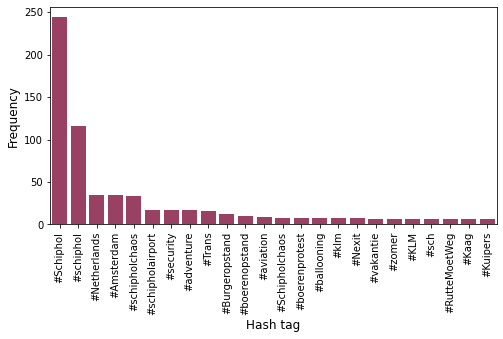

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig = plt.figure( figsize = ( 8,4 ))

ax = sns.barplot( data = df_ht , x = 'hash_tag' , y= 'count' , color = '#a8325e' )

ax.set_xlabel('Hash tag' , fontsize= 12)
ax.set_ylabel('Frequency' , fontsize = 12 )

plt.xticks(rotation= 90)
plt.show()

Create a line chart to show the number of tweets per second (dictionary named ‘tps’)

* Title: ‘Number of tweets per hour’
* X-axis label: ‘Time’
* Y-axis: ‘Number of tweets’
* Line style: '--' ('dashed')
* Colour: ‘#930d08’


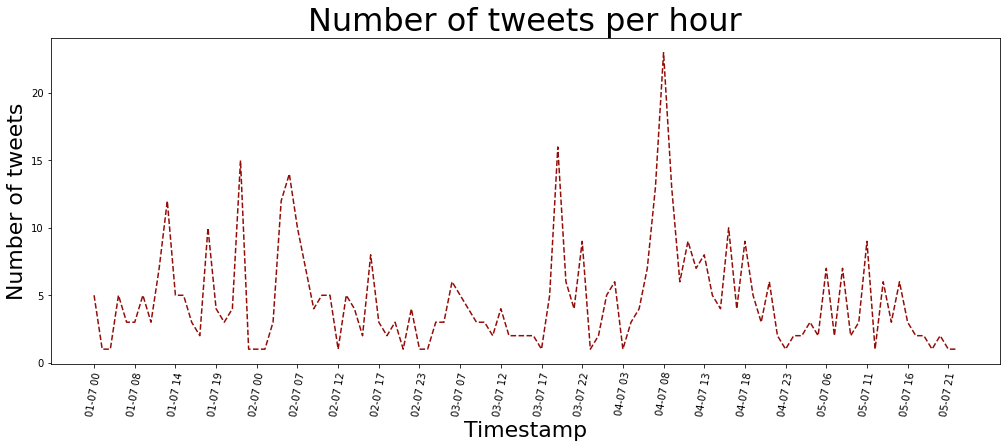

In [52]:
fig = plt.figure( figsize = (17,6))

graph = sns.lineplot( data = tph_df , 
                  x = 'timestamp' , 
                  y = 'count' , 
                  color = '#930d08' , 
                    linestyle = '--')

graph.set_title('Number of tweets per hour' , size = 32) 
graph.set_xlabel('Timestamp' , size = 22) 
graph.set_ylabel('Number of tweets' , size = 22)

graph.set_xticks( range(0,tph_df.shape[0],5) ) 

plt.xticks(rotation=80)
plt.show()

Create a scatter plot to show the number of retweets and the number of likes

* Title: ‘Retweets and likes’
* Colour: ‘#930d08’
* Use plot style ‘darkgrid’ 
* Size of the points: 50

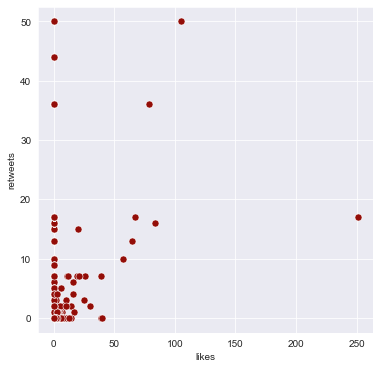

In [62]:
plt.figure( figsize = (6,6) )
sns.set_style('darkgrid')
graph = sns.scatterplot( data=df, x='likes', y='retweets', color='#930d08', s=50)